In [1]:
import os
from io import StringIO
import re
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Get data

In [2]:
### LR shotgun  species ###

path = "real_patient/shotgun_LR_species.csv"
# load csv
px8520_LR_shot_spp = pd.read_csv(path, header=None)
# first column is fraction, second column is species
px8520_LR_shot_spp.columns = ['Fraction', 'Taxa']
px8520_LR_shot_spp['Sample'] = 'LR_shot_spp'
# reorganise columns: sample, fraction, taxa
px8520_LR_shot_spp = px8520_LR_shot_spp[['Sample', 'Fraction', 'Taxa']]

In [3]:
### LR shotgun  genus ###

path = 'real_patient/shotgun_LR_genus.csv'
px8520_LR_shot_genus = pd.read_csv(path, header=None)
px8520_LR_shot_genus = px8520_LR_shot_genus.drop(columns=[2, 3, 4])
px8520_LR_shot_genus.columns = ['Taxa', 'Fraction']
px8520_LR_shot_genus['Sample'] = 'LR_shot_genus'
px8520_LR_shot_genus = px8520_LR_shot_genus[['Sample', 'Fraction', 'Taxa']]

In [4]:
### LR 16s (ONT) Species ###
path = 'real_patient/16s_LR_species.csv'
px8520_LR_16s_spp = pd.read_csv(path, header=None)
px8520_LR_16s_spp = px8520_LR_16s_spp.drop(columns=[2, 3, 4, 5, 6, 7, 8, 9])
px8520_LR_16s_spp.columns = ['Taxa', 'Fraction']
# drop rows where genus = 0
px8520_LR_16s_spp = px8520_LR_16s_spp[px8520_LR_16s_spp['Fraction'] != 0]
px8520_LR_16s_spp['Sample'] = 'LR_16s_spp'
px8520_LR_16s_spp = px8520_LR_16s_spp[['Sample', 'Fraction', 'Taxa']]

In [5]:
### LR 16s (ONT) Genus ###

path = 'real_patient/16s_LR_genus.csv'
px8520_LR_16s_genus = pd.read_csv(path, header=None)
px8520_LR_16s_genus = px8520_LR_16s_genus.drop(columns=[2, 3, 4, 5, 6])
px8520_LR_16s_genus.columns = ['Taxa', 'Fraction']
# drop rows where genus = 0
px8520_LR_16s_genus = px8520_LR_16s_genus[px8520_LR_16s_genus['Fraction'] != 0]
px8520_LR_16s_genus['Sample'] = 'LR_16s_Genus'
px8520_LR_16s_genus = px8520_LR_16s_genus[['Sample', 'Fraction', 'Taxa']]

In [6]:
### SR 16s Genus ###

path = 'real_patient/16s_SR_genus.csv'
px8520_SR_16s_genus = pd.read_csv(path, header=None)
px8520_SR_16s_genus = px8520_SR_16s_genus.drop(columns=[2, 3, 4, 5, 6, 7, 8, 9])
px8520_SR_16s_genus.columns = ['Taxa', 'Fraction']
px8520_SR_16s_genus = px8520_SR_16s_genus[px8520_SR_16s_genus['Fraction'] != 0]
px8520_SR_16s_genus['Sample'] = 'SR_16s_genus'
px8520_SR_16s_genus = px8520_SR_16s_genus[['Sample', 'Fraction', 'Taxa']]

In [7]:
df_list = [px8520_LR_shot_genus, px8520_LR_shot_spp, px8520_LR_16s_genus, px8520_LR_16s_spp, px8520_SR_16s_genus]
spp_df_list = [px8520_LR_shot_spp, px8520_LR_16s_spp]
genus_df_list = [px8520_LR_shot_genus, px8520_LR_16s_genus, px8520_SR_16s_genus]

### Colours

In [8]:
final_colours = {
    "grey": ["#3A3A3A", "#565656", "#6A6A6A", "#949494", "#B5B5B5", "#DCDCDC", "#EBEBEB", "#F3F3F3"], # Acinetobacter n=1
    "bluegrey": ["#303E45", "#3C5059", "#4A636F", "#557280", "#6C8591", "#849AA4", "#A7B6BD", "#C8D3D7"], # Bacillus A n=4
    "blue": ["#165AB8", "#186BCC", "#1C7DE1", "#1F8BF1", "#3A9BF3", "#58ACF6", "#85C3F8", "#B3DAFA"], # Clostridium n=1
    "cyan": ["#046CB5", "#047CCC", "#0790E1", "#079FF2", "#25ADF5", "#46BBF6", "#76CFF9", "#AAE1FC"], # Corynebacteriaceae n=1
    "teal": ["#007884", "#008C9D", "#00A2BA", "#00B4CF", "#22BFD6", "#44CADD", "#74D9E7", "#A9E8F0"], # Corynebacterium n=7
    "forest": ["#005D52", "#006D5F", "#007D6F", "#008B7C", "#229B8E", "#44ADA2", "#74C4BC", "#A9DAD6"], # Enterobacter n=1
    "darkgreen": ["#29722C", "#318335", "#3B963E", "#43A646", "#5BB35F", "#76C079", "#9BD09E", "#C1E3C2"], # Enterobacteriaceae n=1
    "red": ["#BF2524", "#CD2929", "#E2322F", "#F33B2F", "#ED4946", "#E16768", "#ED8F8F", "#FFC6CD"], # Escherichia n=1
    "violet": ["#5F1A8F", "#701D98", "#8221A0", "#9024A7", "#A13EB4", "#B15DC1", "#C788D4", "#DDB6E3"], # Escherichia-Shigella n=1
    "indigo": ["#252F87", "#2B3794", "#3240A1", "#3747AC", "#5260B9", "#6D7AC4", "#959ED5", "#BDC3E6"], # Gammaproteobacteria n=1
    "magenta": ["#D31A55", "#E71C57", "#EA376F", "#EE5787", "#F284A8", "#F7B3CA", "#A3144C", "#BA1751"], # Klebsiella n=5
    "bloodorange": ["#D33B19", "#E24118", "#F3471C", "#FF4D1F", "#FF653A", "#FF7F59", "#FFA186", "#FFC5B5"], # Laceyella n=1
    "purple": ["#5B33AE", "#724CBB", "#896AC6", "#AA92D6", "#3C2396", "#47289E", "#532FA8", "#CBBCE6"], # Moraxella n=4
    "brown": ["#452E29", "#533830", "#624339", "#6E4B3F", "#826358", "#977D73", "#B4A09A", "#D1C5C2"], # Mycobacterium n=1
    "green": ["#5C9531", "#70AA3A", "#80BC41", "#91C559", "#A4CF76", "#BDDD9B", "#D8EAC2", "#4A8029"], # Pseudomonas n=3
    "limegreen": ["#949221", "#A6AB26", "#B8C42D", "#C6D832", "#CEDE4D", "#D7E36A", "#E2EB91", "#EEF2BB"], # Pseudomonas E n=1
    "orange": [ "#ED6106", "#F37004", "#FA8006", "#FF8D04", "#FF9D22", "#FFAE44", "#FFC575", "#FFDDA9"], # Spirillospora n=1
    "yellow": ["#F89E21", "#FCB828", "#FDD32F", "#FFE934", "#FFED4D", "#FFEF6B", "#FEF392", "#FFF8BD"], # Staphylococcus n=7
    "olive": ["#5E6931", "#6B7C3A", "#798F43", "#85A153", "#97AD6B", "#AAB686", "#BFC1A1", "#D5D7BD"], # New Colour 1
    "skyblue": ["#5D8C88", "#6E9F9A", "#80B3AD", "#94C7C1", "#A7DADC", "#BAEDED", "#DCEBF3", "#F0F8F9"], # New Colour 2
    "pink": ["#A23C4D", "#B74B5C", "#CD5B6E", "#E06D81", "#F28496", "#FA99AC", "#FFB2C5", "#FFCDDF"], # New Colour 3
    "navy": ["#2E375E", "#3A466B", "#486181", "#557394", "#6384A9", "#7696BD", "#8FA9D1", "#ABC1E5"], # New Colour 4
    "turquoise": ["#2F555E", "#39666F", "#457F89", "#5498A3", "#65AFBE", "#79C4D5", "#91D9EA", "#AFEFF9"], # New Colour 5
    "peach": ["#A96A53", "#BB7E68", "#CE927D", "#E0A693", "#F1BAAB", "#FFCDBF", "#FFE3D7", "#FFF2EB"] # New Colour 6
}

In [9]:
### Assign colours as per taxonomy ###

colours_df = pd.DataFrame(final_colours)

colourname_list = []
tint_list = []
for column_name in colours_df.columns:
    colourname_list.append(column_name)
    tint_list.append(colours_df[column_name].values)

all_genera = []

# Collect all genera from genus_df_list
for df in genus_df_list:
    all_genera.extend(df['Taxa'])

# list species and genera
unique_genera = sorted(set(all_genera))

all_species = []

for df in spp_df_list:
    all_species.extend(df['Taxa'])

unique_species = sorted(set(all_species))

# check sufficient colours to assign
if len(tint_list) < len(unique_genera):
    raise ValueError("There are more unique genera than there are colours in the colour palette")

# make genus colour df
genus_colour_df = pd.DataFrame(columns=["genus", "colour name", "tints"])

for i in range(len(unique_genera)):
    # Append a new row to the DataFrame
    genus_colour_df.loc[i] = [unique_genera[i], colourname_list[i], tint_list[i]]

genus_colour_df['genus_hex'] = genus_colour_df.apply(lambda x: x['tints'][0], axis=1)
for df in genus_df_list:
    df['genus_hex'] = df['Taxa'].map(genus_colour_df.set_index('genus')['genus_hex'])

# make species colour df
unique_species_df = pd.DataFrame(columns=['genus', 'species'])

unique_species_df['species'] = unique_species
unique_species_df['genus'] = unique_species_df['species'].apply(lambda x: x.split(' ')[0] if len(x.split(' ')) > 1 else x)

unique_species_df = unique_species_df.merge(genus_colour_df[['genus', 'colour name']], on='genus', how='left')
unique_species_df = unique_species_df.merge(genus_colour_df[['genus', 'genus_hex']], on='genus', how='left')
unique_species_df = unique_species_df.merge(genus_colour_df[['genus', 'tints']], on='genus', how='left')

# Initialize a new column for hex codes, initialize genus_matches as 0
unique_species_df['species_hex'] = ''
genus_matches = 0

# Iterate through each row
for i in range(len(unique_species_df)):
    tints_list = unique_species_df.iloc[i]['tints']
    value_to_add = tints_list[genus_matches]
    unique_species_df.at[i, 'species_hex'] = value_to_add

    # Check if it's not the last row to avoid an index out-of-range error
    if i < len(unique_species_df) - 1:
        current_genus = unique_species_df.iloc[i]['genus']
        next_genus = unique_species_df.iloc[i + 1]['genus']
        
        # Check if the genus of the current row matches the next row
        if current_genus == next_genus:
            # increment genus matches
            genus_matches += 1
        else:
            genus_matches = 0

for df in spp_df_list:
    df['species_hex'] = df['Taxa'].map(unique_species_df.set_index('species')['species_hex'])

### Transform data for stacked bar chart

In [10]:
# Create a DataFrame with the unique species as the index
sppDFplot = pd.DataFrame(index=unique_species)

# name the index column "species"
sppDFplot.index.name = "Taxa"

# iterate through each df in final_df_list, name a column after the unique value in sample, and add the fraction to the sppDFplot DataFrame for the corresponding secies in the species column
for df in spp_df_list:
    sample = df['Sample'].unique()[0]
    sppDFplot[sample] = df.set_index('Taxa')['Fraction']

# replace NaN with 0
sppDFplot.fillna(0, inplace=True)

transposed = sppDFplot.T
species_colour_map = unique_species_df.set_index('species')['species_hex'].to_dict()

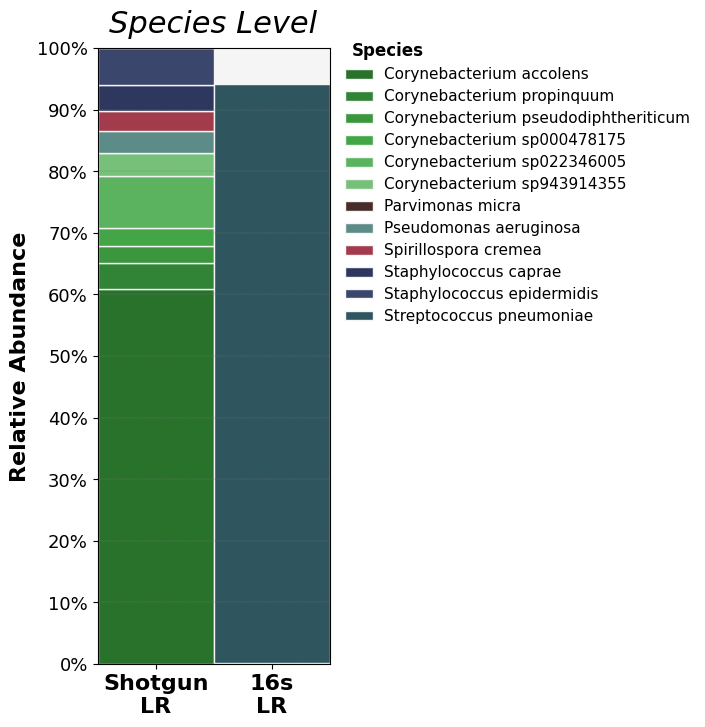

In [70]:

def plot_stackedbar_spp(df, colour_map, title, background_colour, plot_colour,
                  font_colour, line_colour, grid_colour):
    
    fields = df.columns.tolist()
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(3, 8))
    
    # plot bars
    bottom = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.bar(x=df.index, height=df[name], bottom=bottom, color=colour_map[name], 
                alpha=1, edgecolor=plot_colour, width=1, label=name)
        bottom = bottom + df[name]
    
    # legend
    # plt.text(30.15, 1.0375, 'Species', fontsize=14, fontweight='bold', color='#1A237E')
    legend = plt.legend(labels, bbox_to_anchor=([1.01, 1.03, 0, 0]), ncol=1, 
                        frameon=False, title='Species')
    for text in legend.get_texts():
        text.set_color(font_colour)
        text.set_fontsize(11)
    
    legend_title = legend.get_title()
    legend_title.set_fontsize(12)
    legend_title.set_fontweight('bold')
    legend_title.set_color(font_colour)
    legend_title.set_position((-130, 0))
    
    # format y ticks
    yticks = np.arange(0, 1.1, 0.1)
    ylabels = ['{}%'.format(i) for i in np.arange(0, 101, 10)]
    plt.yticks(yticks, ylabels)

    # relabel x ticks
    plt.xticks(df.index, ["Shotgun\nLR", "16s\nLR"])

    # # adjust limits and draw grid lines
    plt.xlim(-0.5, ax.get_xticks()[-1] + 0.5)
    ax.yaxis.grid(color=grid_colour, linestyle='--', linewidth=0.25)

    # axes label colour and font
    ax.tick_params(axis='x', colors=line_colour)
    ax.tick_params(axis='y', colors=line_colour)

    for label in ax.get_xticklabels():
        label.set_fontsize(16)
        label.set_fontweight('bold')

    for label in ax.get_yticklabels():
        label.set_fontsize(13)

    # Rotate x-axis tick labels
    plt.xticks(rotation=0)

    # Grid params
    ax.set_facecolor(plot_colour)

    # Figure params
    figure = plt.gcf()
    figure.set_facecolor(background_colour)

    # title and labels
    plt.text(-0.4, 1.025, title, fontsize=22, fontstyle='italic', color=font_colour)
    ax.set_ylabel('Relative Abundance', color=font_colour, fontsize=16, fontweight='bold', labelpad=5)

    plt.show()


labels = unique_species #labels for legend
title = "Species Level"
background_colour = 'none'
plot_colour = 'whitesmoke'
grid_colour = 'grey'
line_colour = 'black'
font_colour = 'black'

plot_stackedbar_spp(transposed, species_colour_map, title, background_colour, 
                    plot_colour, font_colour, line_colour, grid_colour)


In [36]:
### DATA FOR GENUS LEVEL ###

# Create a DataFrame with the unique species as the index
genusDFplot = pd.DataFrame(index=unique_genera)

# name the index column "Taxa"
genusDFplot.index.name = "Taxa"

# iterate through each df in final_df_list, name a column after the unique value in sample, and add the fraction to the sppDFplot DataFrame for the corresponding secies in the species column
for df in genus_df_list:
    sample = df['Sample'].unique()[0]
    genusDFplot[sample] = df.set_index('Taxa')['Fraction']

genusDFplot.fillna(0, inplace=True)

transposed_genus = genusDFplot.T

genus_colour_map = genus_colour_df.set_index('genus')['genus_hex'].to_dict()

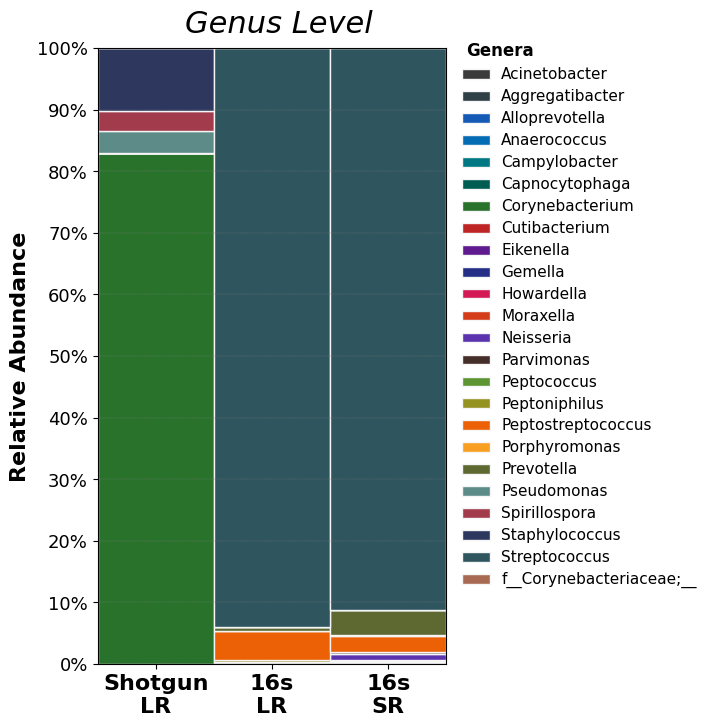

In [75]:
def plot_stackedbar_genus(df, colour_map, title, background_colour, 
                    plot_colour, font_colour, line_colour, grid_colour):
    fields = df.columns.tolist()
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(4.5, 8))
    
    # plot bars
    bottom = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.bar(x=df.index, height=df[name], bottom=bottom, color=colour_map[name], alpha=1, 
                edgecolor=plot_colour, width=1, label=name)
        bottom = bottom + df[name]
    
    # legend
    # plt.text(30.15, 1.0375, 'Species', fontsize=14, fontweight='bold', color='#1A237E')
    legend_labels = df.columns.tolist()
    legend = plt.legend(legend_labels, bbox_to_anchor=([1.01, 1.03, 0, 0]), ncol=1, 
                        frameon=False, title='Genera')
    for text in legend.get_texts():
        text.set_color(font_colour)
        text.set_fontsize(11)
    legend_title = legend.get_title()
    legend_title.set_fontsize(12)
    legend_title.set_fontweight('bold')
    legend_title.set_color(font_colour)
    legend_title.set_position((-80, 0))
    
    # format y ticks
    yticks = np.arange(0, 1.1, 0.1)
    ylabels = ['{}%'.format(i) for i in np.arange(0, 101, 10)]
    plt.yticks(yticks, ylabels)

    # relabel x ticks
    plt.xticks(df.index, ["Shotgun\nLR", "16s\nLR", "16s\nSR"])

    # # adjust limits and draw grid lines
    plt.xlim(-0.5, ax.get_xticks()[-1] + 0.5)
    ax.yaxis.grid(color=grid_colour, linestyle='--', linewidth=0.25)

    # axes label colour and font
    ax.tick_params(axis='x', colors=line_colour)
    ax.tick_params(axis='y', colors=line_colour)

    for label in ax.get_xticklabels():
        label.set_fontsize(16)
        label.set_fontweight('bold')

    for label in ax.get_yticklabels():
        label.set_fontsize(13)

    # Rotate x-axis tick labels
    plt.xticks(rotation=0)

    # Grid params
    ax.set_facecolor(plot_colour)

    # Figure params
    figure = plt.gcf()
    figure.set_facecolor(background_colour)

    # title and labels
    plt.text(0.25, 1.025, title, fontsize=22, fontstyle='italic', color=font_colour)
    ax.set_ylabel('Relative Abundance', color=font_colour, fontsize=16, fontweight='bold', labelpad=5)

    plt.show()

# Assuming all_mocks_coloured is your DataFrame
labels = unique_genera #labels for legend
title = "Microbiome of CRSwNP Patient by Sequencing Method"
title = "Genus Level"
background_colour = 'none'
plot_colour = 'whitesmoke'
grid_colour = 'grey'
line_colour = 'black'
font_colour = 'black'

plot_stackedbar_genus(transposed_genus, genus_colour_map, title, background_colour, 
                    plot_colour, font_colour, line_colour, grid_colour)
